<a href="https://colab.research.google.com/github/jonbaer/googlecolab/blob/master/stable_diffusion_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion Implemented in Tensorflow / Keras
https://github.com/divamgupta/stable-diffusion-tensorflow

by Divam Gupta

Includes Gradio demo

In [ ]:
! pip install --upgrade git+https://github.com/divamgupta/stable-diffusion-tensorflow
! pip install tensorflow_addons
! pip install ftfy
! pip install -q gradio

In [ ]:
from stable_diffusion_tf.stable_diffusion import get_model, text2image
text_encoder, diffusion_model, decoder = get_model(512, 512, download_weights=True)


3440328704/3440313488 [==============================] - 191s 0us/step


# Gradio Web UI

In [ ]:
import numpy as np
import gradio as gr

def generate_image(prompt_input, img_height, img_width , n_steps):
    img_height = int(img_height)
    img_width = int(img_width)
    n_steps = int(n_steps)
    prompt_input = str(prompt_input)

    return text2image(prompt_input , 
      img_height=img_height, 
      img_width=img_width,  
      text_encoder=text_encoder, 
      diffusion_model=diffusion_model, 
      decoder=decoder,
      batch_size=1,
      n_steps=n_steps
    )[0]

with gr.Blocks() as demo:
    gr.Markdown("Flip text or image files using this demo.")
    with gr.Tab("Text to Image"):
        with gr.Row():
            prompt_input = gr.Textbox(label="Prompt")
            img_height = gr.Textbox("512" , label="Img Height")
            img_width = gr.Textbox("512" , label="Img Width")
            n_steps = gr.Textbox("25" , label="N Steps")
            

            image_output = gr.Image()
        image_button = gr.Button("Generate")

    image_button.click(generate_image, inputs=[prompt_input, img_height, img_width , n_steps ], outputs=image_output)

demo.launch()


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://13036.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f763c08f210>,
 'http://127.0.0.1:7861/',
 'https://13036.gradio.app')

# Simple Pyton Usage:

running for [1, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 721, 761, 801, 841, 881, 921, 961] timesteps


  0   1: 100%|██████████| 25/25 [00:37<00:00,  1.49s/it]


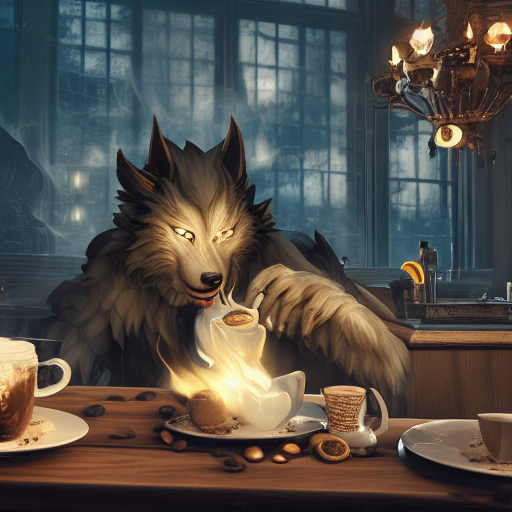

In [ ]:
img = text2image("A epic and beautiful rococo werewolf drinking coffee, in a burning coffee shop. ultra-detailed. anime, pixiv, uhd 8k cryengine, octane render" , 
	img_height=512, 
	img_width=512,  
	text_encoder=text_encoder, 
	diffusion_model=diffusion_model, 
	decoder=decoder,
  batch_size=1
)

from PIL import Image
Image.fromarray(img[0])